In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

csv_file_path = 'baseline.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

Exploratory Data Analysis

In [3]:
# Display variable names and their data types
for column in df.columns:
    print(f"{column}: {df[column].dtype}")


SHA: object
cbo: int64
wmc: int64
dit: int64
rfc: int64
lcom: int64
totalMethods: int64
totalFields: int64
nosi: int64
loc: int64
returnQty: int64
loopQty: int64
comparisonsQty: int64
tryCatchQty: int64
parenthesizedExpsQty: int64
stringLiteralsQty: int64
numbersQty: int64
assignmentsQty: int64
mathOperationsQty: int64
variablesQty: int64
maxNestedBlocks: int64
uniqueWordsQty: int64
defect: int64


In [4]:
df.shape

(6052, 23)

In [5]:
# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               cbo          wmc          dit          rfc           lcom  \
count  6052.000000  6052.000000  6052.000000  6052.000000    6052.000000   
mean     27.493721    86.177958     4.599141    68.954395    1242.030238   
std      33.214827   136.077153     9.288447    85.771623    9449.009245   
min       0.000000     0.000000     1.000000     0.000000       0.000000   
25%       9.000000    18.000000     1.000000    18.000000       4.000000   
50%      18.000000    45.000000     2.000000    44.000000      43.000000   
75%      34.000000   100.000000     4.000000    89.000000     267.000000   
max     419.000000  1714.000000   285.000000  1203.000000  199855.000000   

       totalMethods  totalFields         nosi          loc    returnQty  ...  \
count   6052.000000  6052.000000  6052.000000  6052.000000  6052.000000  ...   
mean      33.497852    14.049405     5.945142   442.074190    25.410112  ...   
std       53.556999    26.051029    25.263058   68

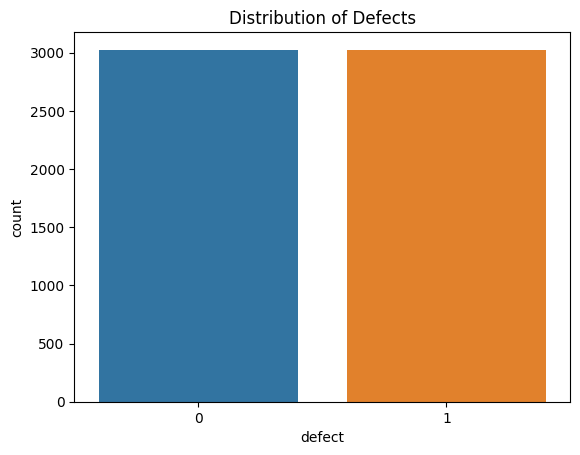

In [6]:
# Explore target variable distribution
sns.countplot(x='defect', data=df)
plt.title("Distribution of Defects")
plt.show()

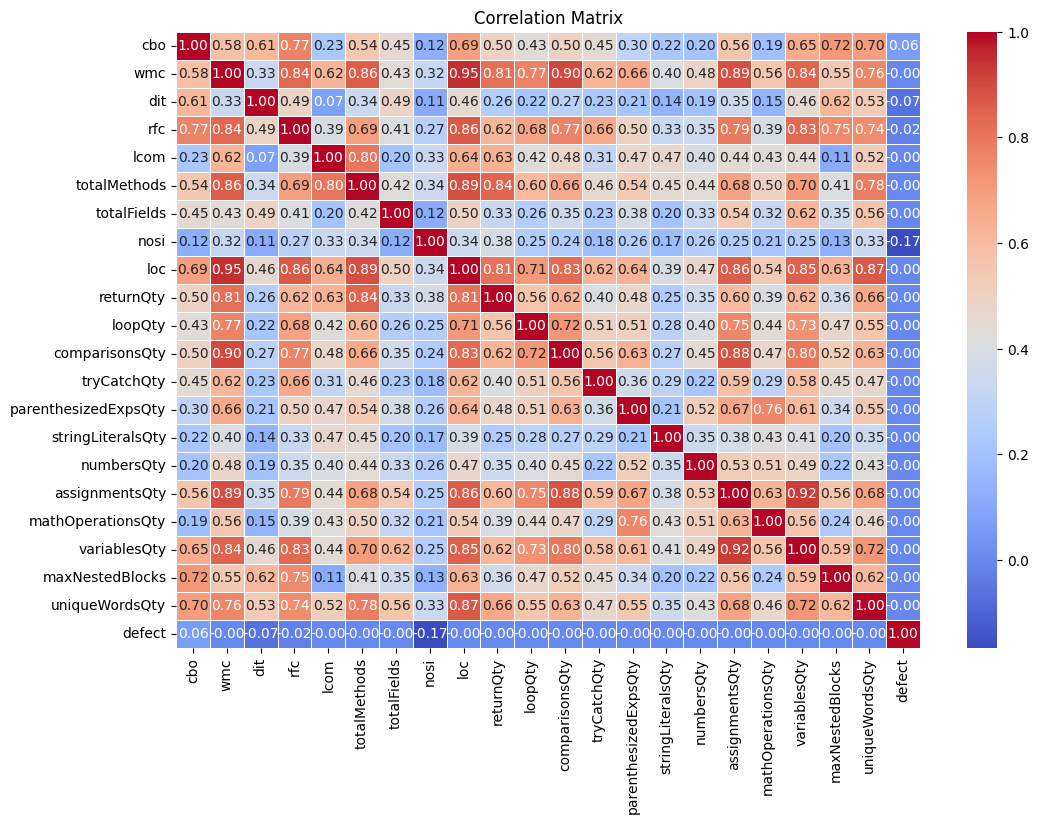

In [7]:
# Convert numeric columns to numeric data type
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop non-numeric columns if necessary
numeric_df = df.select_dtypes(include='number')

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Distribution plots for numerical features
numerical_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='defect', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Defect')
plt.tight_layout()
plt.show()

Data Preprocessing

In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
SHA                     0
cbo                     0
wmc                     0
dit                     0
rfc                     0
lcom                    0
totalMethods            0
totalFields             0
nosi                    0
loc                     0
returnQty               0
loopQty                 0
comparisonsQty          0
tryCatchQty             0
parenthesizedExpsQty    0
stringLiteralsQty       0
numbersQty              0
assignmentsQty          0
mathOperationsQty       0
variablesQty            0
maxNestedBlocks         0
uniqueWordsQty          0
defect                  0
dtype: int64


Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Select all columns except the first one
columns_to_scale = df.columns[1:]

# Create a new DataFrame with the scaled values
scaled_df = df.copy()
mx = MinMaxScaler()
scaled_df[columns_to_scale] = mx.fit_transform(df[columns_to_scale])

In [11]:
scaled_df.head()

,SHA,cbo,wmc,dit,rfc,lcom,totalMethods,totalFields,nosi,loc,...,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocks,uniqueWordsQty,defect
0,7a955fd6c7de2bd912be544dcfe77f9173a7aa600,0.011933,0.035006,0.003521,0.045719,0.000946,0.035620,0.005537,0.063158,0.027306,...,0.032,0.009174,0.010293,0.003151,0.013393,0.009980,0.016190,0.038961,0.055689,0.0
1,000f1ab4780fc9460975791c52597f7c04e15be70,0.007160,0.005834,0.000000,0.000831,0.000045,0.009235,0.004430,0.002105,0.003626,...,0.000,0.000000,0.000000,0.007703,0.001984,0.000000,0.003810,0.025974,0.019162,0.0
2,000f1ab4780fc9460975791c52597f7c04e15be71,0.007160,0.005834,0.000000,0.000831,0.000045,0.009235,0.004430,0.000000,0.003626,...,0.000,0.000000,0.000000,0.007703,0.001984,0.000000,0.003810,0.025974,0.019162,1.0
3,0024dbdd6ba3cc7797cc0b1ae537dcdc488c4c270,0.047733,0.034422,0.007042,0.052369,0.000946,0.031662,0.009967,0.008421,0.029005,...,0.000,0.027523,0.001314,0.004902,0.022321,0.015968,0.039048,0.051948,0.064970,0.0
4,0024dbdd6ba3cc7797cc0b1ae537dcdc488c4c271,0.050119,0.033839,0.003521,0.050707,0.000946,0.031662,0.009967,0.000000,0.028779,...,0.000,0.027523,0.001314,0.004902,0.022321,0.015968,0.039048,0.051948,0.064970,1.0


Feature Selection

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separate features and target
X = df.drop(columns=["SHA", "defect"])
y = df["defect"]

# Use chi-squared test for feature selection
k = 21 
k_best = SelectKBest(score_func=chi2, k=k)
X_selected = k_best.fit_transform(X, y)

# Get the selected features and their scores
selected_feature_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
scores = k_best.scores_[selected_feature_indices]

# Create a DataFrame to display the selected features and their scores
selected_features_df = pd.DataFrame({'Feature': selected_features, 'Chi-squared Score': scores})
selected_features_df = selected_features_df.sort_values(by='Chi-squared Score', ascending=False)
print("Top-k selected features:")
print(selected_features_df)

Top-k selected features:
                 Feature  Chi-squared Score
7                   nosi       18132.122401
0                    cbo         988.050411
2                    dit         504.688654
3                    rfc         354.795031
8                    loc          24.504971
20        uniqueWordsQty          12.629652
1                    wmc           6.958167
15            numbersQty           5.589173
16        assignmentsQty           4.935570
11        comparisonsQty           3.303042
18          variablesQty           3.265038
14     stringLiteralsQty           2.110992
4                   lcom           1.924073
9              returnQty           1.236139
19       maxNestedBlocks           0.807926
5           totalMethods           0.701079
17     mathOperationsQty           0.479108
13  parenthesizedExpsQty           0.444183
6            totalFields           0.402519
12           tryCatchQty           0.353699
10               loopQty           0.336387


In [13]:
# Assuming you have the scores DataFrame
significance_level = 0.05
significant_features = selected_features_df[selected_features_df['Chi-squared Score'] >= significance_level]['Feature'].tolist()

# Print the significant features
print("Significant Features:")
print(significant_features)


Significant Features:
['nosi', 'cbo', 'dit', 'rfc', 'loc', 'uniqueWordsQty', 'wmc', 'numbersQty', 'assignmentsQty', 'comparisonsQty', 'variablesQty', 'stringLiteralsQty', 'lcom', 'returnQty', 'maxNestedBlocks', 'totalMethods', 'mathOperationsQty', 'parenthesizedExpsQty', 'totalFields', 'tryCatchQty', 'loopQty']


In [14]:
column_to_drop = 'SHA'
df = scaled_df.drop(column_to_drop, axis=1)

Train a Random Forest Classifier Model

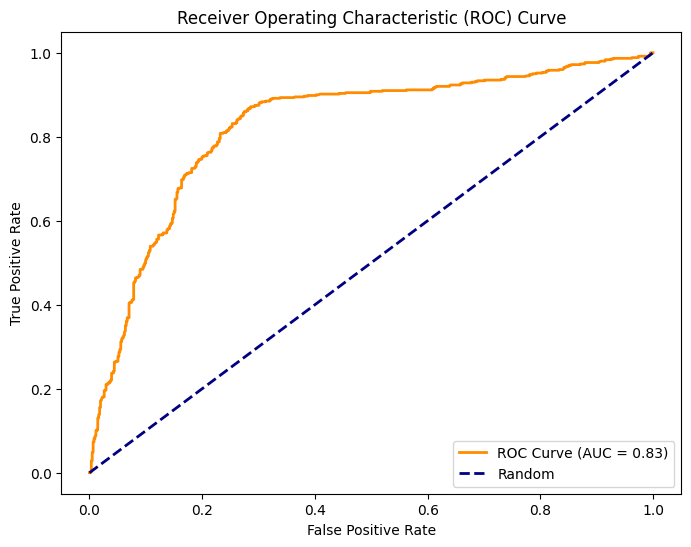

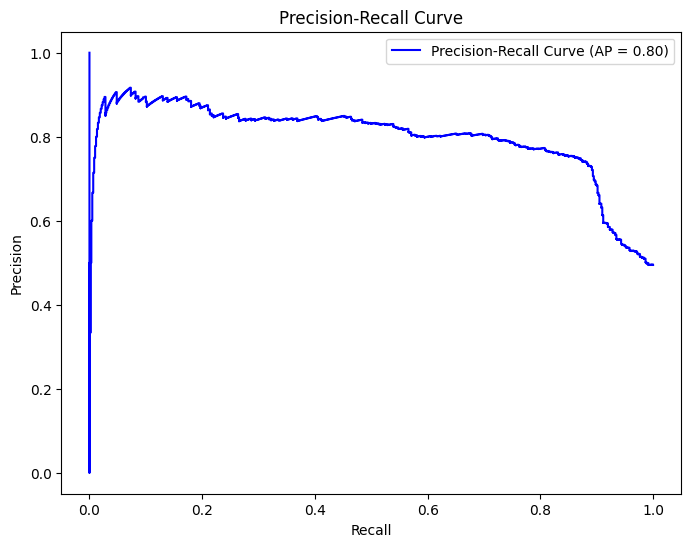

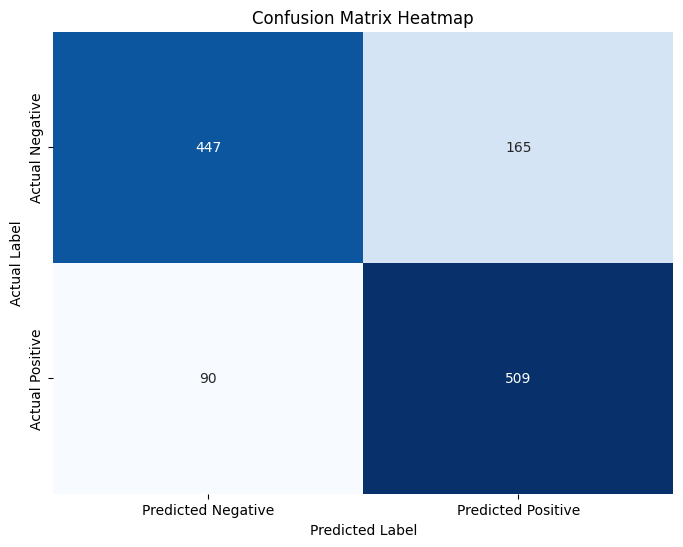

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score

# Separate features (X) and target variable (y)
X = df.drop(columns=['defect'])  
y = df['defect']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with specified hyperparameters
rf_classifier = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=150)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
y_pred = rf_classifier.predict(X_test)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()



In [26]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix


# Separate features (X) and target variable (y)
X = df.drop(columns=['defect'])  # Adjust column name if needed
y = df['defect']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_results = cross_val_score(rf_classifier, X, y, cv=kf, scoring=make_scorer(accuracy_score))

# Print the cross-validation results
print(f'Cross-Validation Accuracy: {cv_results.mean():.2f} (±{cv_results.std():.2f})')

# Optionally, you can print other metrics for each fold
for fold_num, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)

    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_conf_matrix = confusion_matrix(y_test, y_pred)
    fold_classification_rep = classification_report(y_test, y_pred)

    print(f'\nFold {fold_num} Results:')
    print(f'Accuracy: {fold_accuracy:.2f}')
    print('Confusion Matrix:')
    print(fold_conf_matrix)
    print('Classification Report:')
    print(fold_classification_rep)


Cross-Validation Accuracy: 0.70 (±0.01)

Fold 1 Results:
Accuracy: 0.70
Confusion Matrix:
[[420 192]
 [177 422]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.69       612
         1.0       0.69      0.70      0.70       599

    accuracy                           0.70      1211
   macro avg       0.70      0.70      0.70      1211
weighted avg       0.70      0.70      0.70      1211


Fold 2 Results:
Accuracy: 0.69
Confusion Matrix:
[[422 197]
 [179 413]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       619
         1.0       0.68      0.70      0.69       592

    accuracy                           0.69      1211
   macro avg       0.69      0.69      0.69      1211
weighted avg       0.69      0.69      0.69      1211


Fold 3 Results:
Accuracy: 0.72
Confusion Matrix:
[[396 177]
 [164 473]]
Classification Report:
              prec

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features (X) and target variable (y)
X = df.drop(columns=['defect'])  # Adjust column name if needed
y = df['defect']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.78

Confusion Matrix:
[[450 162]
 [104 495]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       612
         1.0       0.75      0.83      0.79       599

    accuracy                           0.78      1211
   macro avg       0.78      0.78      0.78      1211
weighted avg       0.78      0.78      0.78      1211



In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features (X) and (y)
X = df.drop(columns=['defect']) 
y = df['defect']

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_classifier = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=150)

# Train the model 
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.79

Confusion Matrix:
[[446 166]
 [ 93 506]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.73      0.77       612
         1.0       0.75      0.84      0.80       599

    accuracy                           0.79      1211
   macro avg       0.79      0.79      0.79      1211
weighted avg       0.79      0.79      0.79      1211



In [17]:
!python -m pip install scikit-optimize


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV

# Separate features (X) and target variable (y)
X = df.drop(columns=['defect'])  # Adjust column name if needed
y = df['defect']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_space = {
    'n_estimators': (50, 150),         # Number of trees
    'max_depth': (1, 30),              # Maximum depth of trees
    'min_samples_split': (2, 10),      # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 4),        # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the Bayesian optimization search
bayes_search = BayesSearchCV(
    estimator=rf_classifier,
    search_spaces=param_space,
    n_iter=30,           # Number of optimization steps
    n_jobs=-1,
    cv=3,                # Number of cross-validation folds
    scoring='accuracy',
    random_state=42,
    verbose=1
)

# Fit the Bayesian optimization search to find the best hyperparameters
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = bayes_search.best_params_

# Train the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

Accuracy: 0.66

Confusion Matrix:
[[236 376]
 [ 36 563]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.39      0.53       612
         1.0       0.60      0.94      0.73       599

    accuracy                           0.66      1211
   macro avg       0.73      0.66      0.63      1211
weighted avg       0.74      0.66      0.63      1211

Average Precision: 0.75


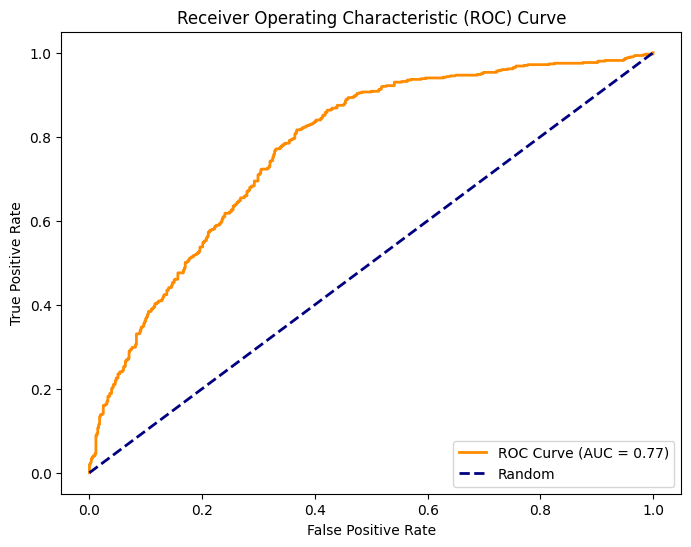

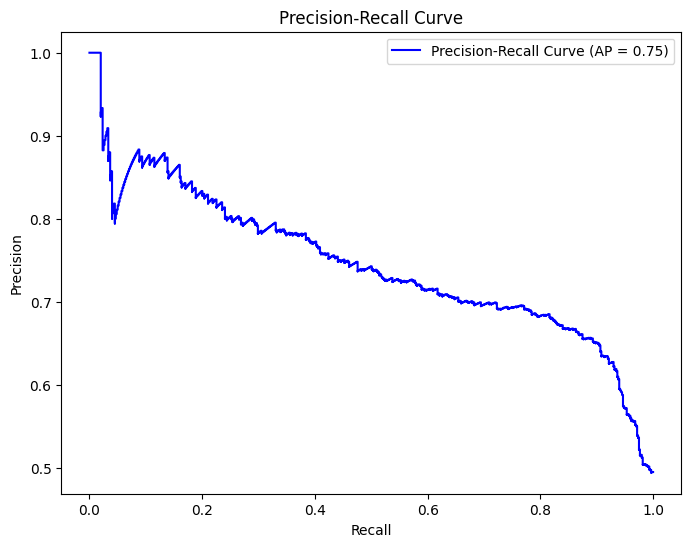

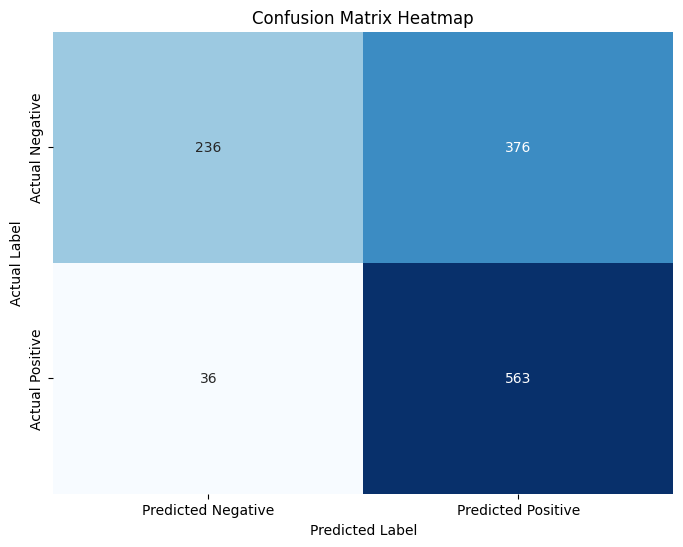

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc, average_precision_score


# Separate features (X) and target variable (y)
X = df.drop(columns=['defect'])  
y = df['defect']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes Classifier
naive_bayes_classifier = MultinomialNB()

# Train the model on the training set
naive_bayes_classifier.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_pred_proba = naive_bayes_classifier.predict_proba(X_test)[:, 1]
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred_proba)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)
print(f'Average Precision: {average_precision:.2f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV

# Separate features (X) and target variable (y)
X = df.drop(columns=['defect']) 
y = df['defect']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_space = {
    'alpha': (1e-6, 1e+6, 'log-uniform'),  
}

# Initialize the Multinomial Naive Bayes Classifier
naive_bayes_classifier = MultinomialNB()

# Initialize the Bayesian optimization search
bayes_search = BayesSearchCV(
    estimator=naive_bayes_classifier,
    search_spaces=param_space,
    n_iter=30,           # Number of optimization steps
    n_jobs=-1,
    cv=3,                # Number of cross-validation folds
    scoring='accuracy',
    random_state=42,
    verbose=1
)

# Fit the Bayesian optimization search to find the best hyperparameters
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = bayes_search.best_params_

# Train the model with the best hyperparameters
best_naive_bayes_classifier = MultinomialNB(**best_params)
best_naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_naive_bayes_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

Accuracy: 0.70
Average Precision: 0.72


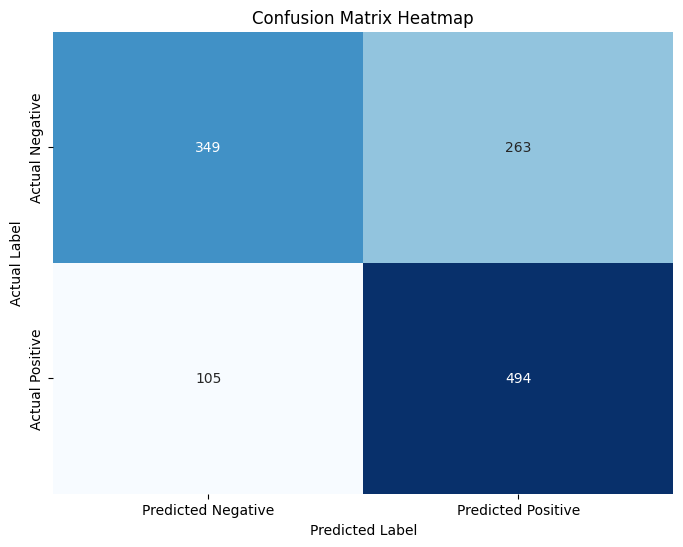

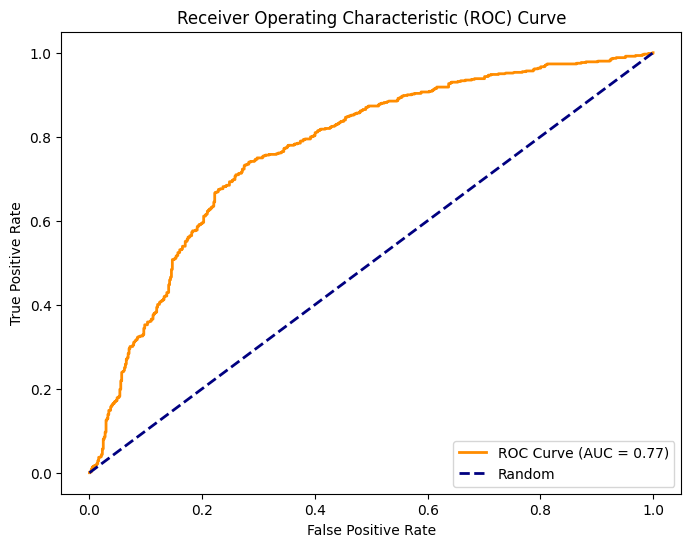

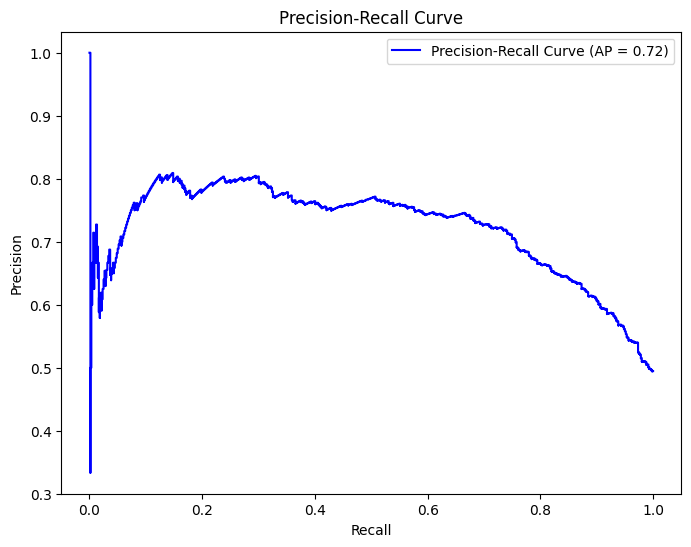

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_recall_curve, auc, average_precision_score
from skopt import BayesSearchCV



# Separate features (X) and target variable (y)
X = df.drop(columns=['defect']) 
y = df['defect']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM Classifier
svm_classifier = SVC(C=100, gamma='scale', kernel='rbf')

# Train the model on the training set
svm_classifier.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_pred_proba = svm_classifier.decision_function(X_test)
y_pred = svm_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred_proba)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Average Precision: {average_precision:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features (X) and target variable (y)
X = df.drop(columns=['defect']) 
y = df['defect']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Define the hyperparameter search space for SVM
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize GridSearchCV for hyperparameter tuning for SVM
grid_search_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid_svm,
    scoring='accuracy',
    cv=3,      # Number of cross-validation folds
    verbose=1,
    n_jobs=-1
)

# Fit the model with hyperparameter tuning for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters for SVM
best_params_svm = grid_search_svm.best_params_

# Train the model with the best hyperparameters for SVM
best_svm_model = SVC(**best_params_svm, random_state=42)
best_svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the model performance for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Print the results for SVM
print(f'Best Hyperparameters (SVM): {best_params_svm}')
print(f'Accuracy (SVM): {accuracy_svm:.2f}')
print('Confusion Matrix (SVM):')
print(conf_matrix_svm)
print('Classification Report (SVM):')
print(classification_rep_svm)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Hyperparameters (SVM): {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy (SVM): 0.70
Confusion Matrix (SVM):
[[349 263]
 [105 494]]
Classification Report (SVM):
              precision    recall  f1-score   support

         0.0       0.77      0.57      0.65       612
         1.0       0.65      0.82      0.73       599

    accuracy                           0.70      1211
   macro avg       0.71      0.70      0.69      1211
weighted avg       0.71      0.70      0.69      1211



Accuracy: 0.73
Average Precision: 0.77


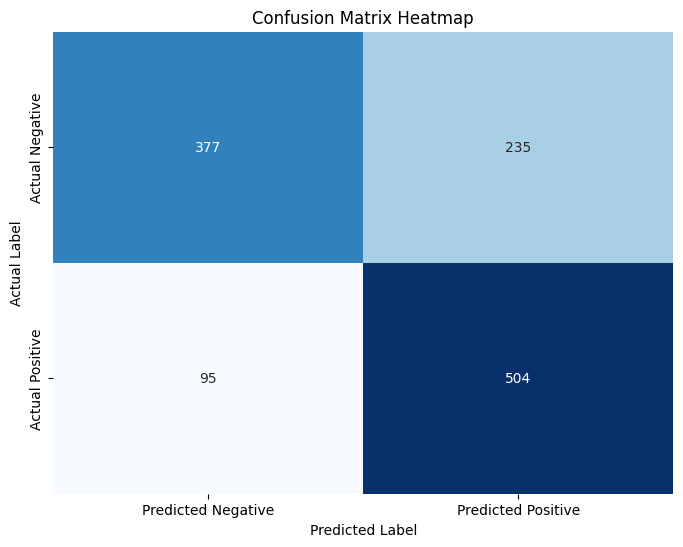

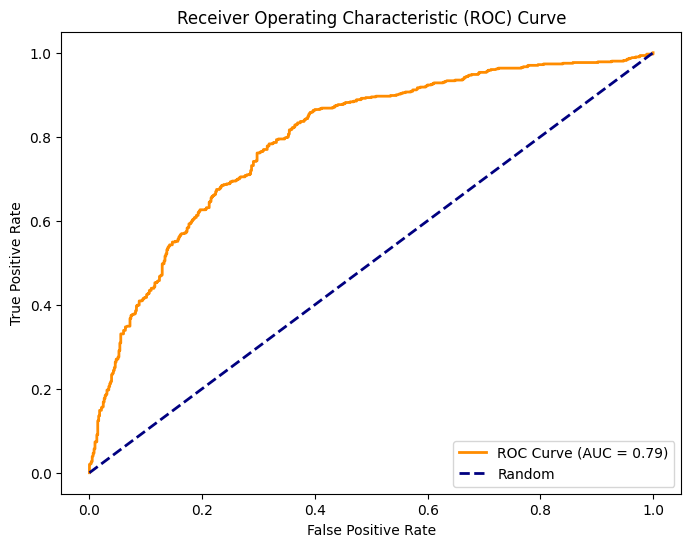

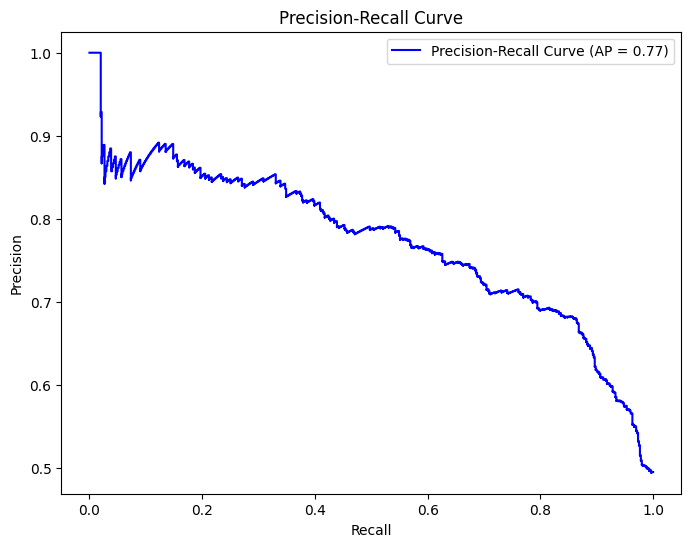

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_recall_curve, auc, average_precision_score


# Separate features (X) and target variable (y)
X = df.drop(columns=['defect']) 
y = df['defect']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(C=1000, penalty='l2')

# Train the model on the training set
logistic_regression_model.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_pred_proba = logistic_regression_model.predict_proba(X_test)[:, 1]
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred_proba)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Average Precision: {average_precision:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features (X) and target variable (y)
X = df.drop(columns=['defect'])  
y = df['defect']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Define the hyperparameter search space
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=logistic_regression_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1
)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_logistic_regression_model = LogisticRegression(**best_params, random_state=42)
best_logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_logistic_regression_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Fitting 3 folds for each of 14 candidates, totalling 42 fits

c:\Users\PC-LIFE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC-LIFE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC-LIFE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PC-LIF

Best Hyperparameters: {'C': 1000, 'penalty': 'l2'}
Accuracy: 0.73
Confusion Matrix:
[[377 235]
 [ 95 504]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.62      0.70       612
         1.0       0.68      0.84      0.75       599

    accuracy                           0.73      1211
   macro avg       0.74      0.73      0.72      1211
weighted avg       0.74      0.73      0.72      1211



Feature Importance

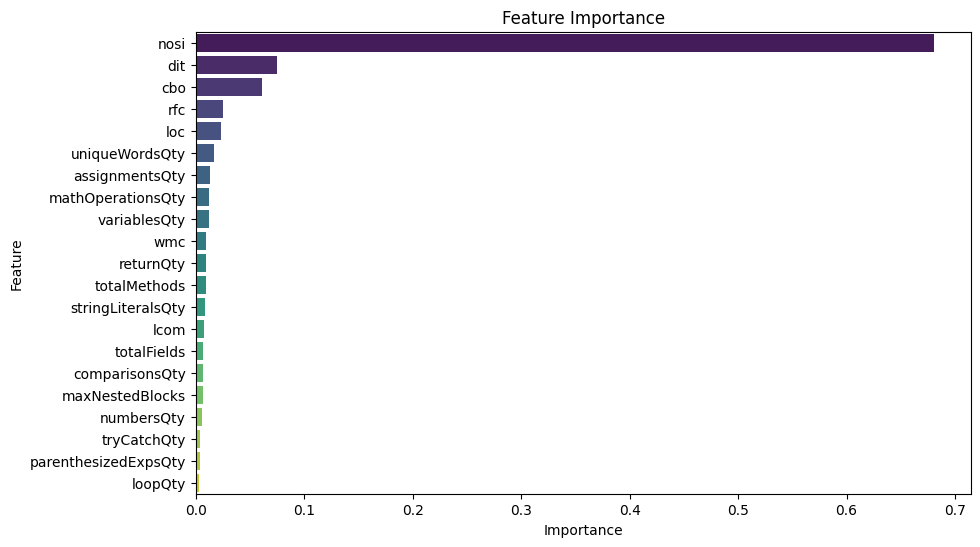

In [35]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame 
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

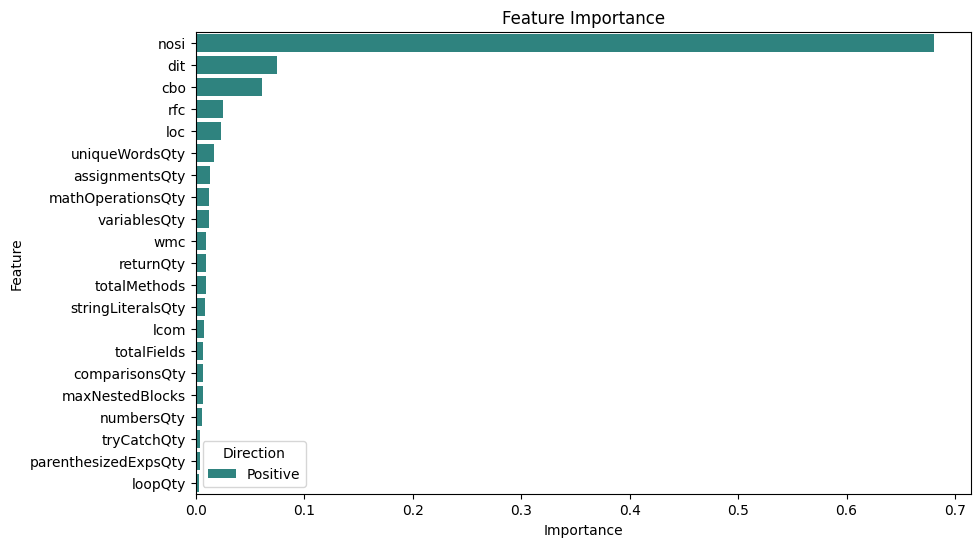

In [36]:
# Add a column indicating the direction of importance
feature_importance_df['Direction'] = ['Positive' if imp > 0 else 'Negative' for imp in feature_importances]

# Plot feature importance with direction
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Direction', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


In [ ]:
visualizing results

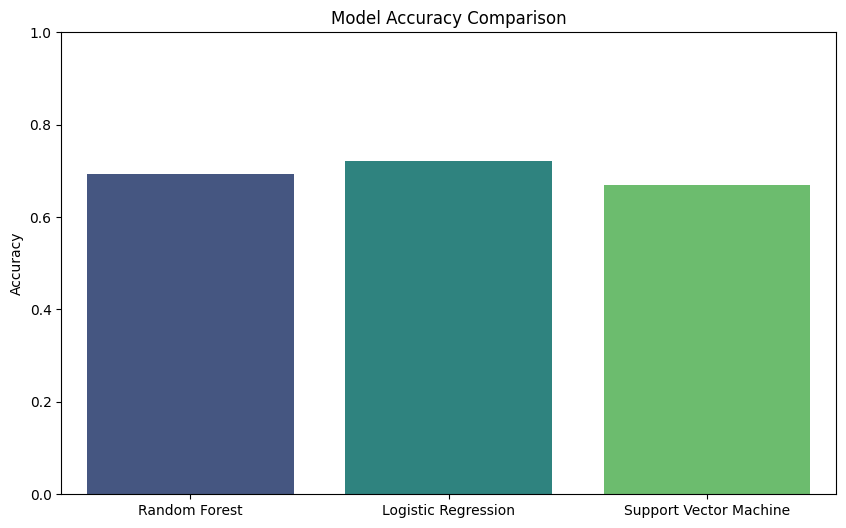

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Separate features (X) and target variable (y)
X = df.drop(columns=['defect'])
y = df['defect']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = [
    {"name": "Random Forest", "model": RandomForestClassifier(), "params": {"max_depth": 5, "min_samples_leaf":4,"min_samples_split":10,"n_estimators":150}},
    {"name": "Logistic Regression", "model": LogisticRegression(), "params": {'C': 1000, 'penalty': 'l2'}},
    {"name": "Support Vector Machine", "model": SVC(), "params": {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}},
]

# Initialize lists to store results
model_names = []
accuracies = []

# Evaluate each model
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]
    params = model_info["params"]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Store results in lists
    model_names.append(model_name)
    accuracies.append(accuracy)

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy percentage (0 to 1)
plt.show()
